In [ ]:
# CS 181, Harvard University
# Spring 2016
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as c
import time
from Perceptron import Perceptron
from numpy.core.umath_tests import inner1d
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import svm

In [17]:
# Implement this class
class KernelPerceptron(Perceptron):
    def __init__(self, numsamples):
        self.numsamples = numsamples
        self.alphas =  {} #of len(x)
        self.b = 0.0
        self.SV_indices = []
        self.X = []
        self.Y = []
        self.timefit = 0.0
        self.timepredict = 0.0

    def fit(self, X, Y):
        print("\n\n========= *** Fitting Perceptron *** ==========")
        t_start = time.time()
        X = np.array(X)
        self.X = X
        self.Y = Y
        # K(x,x2 ) = x.T *  x2
        #np.random.seed(314159)
        SV_indices = set()
        alphas = {}
        
        for i in range(self.numsamples):
            t = np.random.randint(X.shape[0])
            xt = X[t]
            y_hat = np.sum(alphas[idx]*inner1d(xt,X[idx]) for idx in SV_indices)
            y_true = Y[t]
            if y_true * y_hat <= 0:
                SV_indices.add(t)
                alphas.update({t:y_true})
        self.alphas = alphas
        self.SV_indices = SV_indices
        t_elapsed = time.time() - t_start
        self.timefit = t_elapsed
        print("Elapsed time for fitting ", X.shape, " datapoints: ", t_elapsed, " seconds." )

    def predict(self, X):
        t_start = time.time()
        print("=== Predicting ===")
        #print('support vector indices', self.SV_indices)
        #print('\nalphas', self.alphas)

        y_hats = []
        for xt in X:
            boo =  [self.alphas[sv_i]*np.dot(xt,self.X[sv_i]) for sv_i in self.SV_indices] 
            y_hat = np.sum(boo)
            if y_hat == 0:
                y_hat = 1
            y_hats.append(y_hat)
        y_hats = np.array(y_hats)
        y_hats = np.sign(y_hats)

        at_elapsed = time.time() - t_start
        self.timepredict = at_elapsed
        print("Elapsed time for predicting", X.shape, " datapoints: ", at_elapsed, "seconds.")
        print("samples %d, data shape %d" % (self.numsamples, self.X.shape[0]))
        return y_hats 


# Implement this class
class BudgetKernelPerceptron(Perceptron):
    def __init__(self, beta, N, numsamples):
        self.beta = beta
        self.N = N
        self.numsamples = numsamples
        self.X = X
        self.Y = Y
        self.timefit = 0.0
        self.timepredict = 0.0
        self.SV_indices = []


    def fit(self, X, Y):
        print("\n\n========= *** Fitting Budget Perceptron *** ==========")
        t_start = time.time()

        X = np.array(X)
        self.X = X
        self.Y = Y

        SV_indices = []
        alphas = {}
        y_hats = {}

        for i in range(self.numsamples):
            t = np.random.randint(X.shape[0])
            xt = X[t]
            y_hat = np.sum(alphas[idx]*inner1d(xt,X[idx]) for idx in SV_indices)
            y_hats.update({t:y_hat})
            y_true = Y[t]

            if y_true * y_hat <= self.beta:
                if t not in SV_indices:
                    SV_indices.append(t)
                alphas.update({t:y_true})
                # removal step
                if len(SV_indices) > self.N:
                    foo = [ Y[i] * (y_hats[i] - alphas[i]*np.dot(X[i], X[i])) \
                            for i in SV_indices ]
                    arg_maxmarg = foo.index(max(foo))
                    del(SV_indices[arg_maxmarg])
        self.alphas = alphas
        self.SV_indices = SV_indices
        t_elapsed = time.time() - t_start
        self.timefit = t_elapsed
        print("Elapsed time for fitting ", X.shape, " datapoints: ", t_elapsed, " seconds." )
        print("N %d, beta %d, samples %d, data shape %d" % (self.N, self.beta, self.numsamples,
            self.X.shape[0]))

    def predict(self, X):
        t_start = time.time()
        print("=== Predicting ===")

        y_hats = []
        for xt in X:
            boo =  [self.alphas[sv_i]*np.dot(xt,self.X[sv_i]) for sv_i in self.SV_indices] 
            y_hat = np.sum(boo)
            if y_hat == 0: #dealing with the meshgrid has zeros at the beginning
                y_hat = 1
            y_hats.append(y_hat)
        y_hats = np.array(y_hats)
        y_hats = np.sign(y_hats)

        t_elapsed = time.time() - t_start
        self.timepredict = t_elapsed
        print("Elapsed time for predicting", X.shape, " datapoints: ", t_elapsed, "seconds.")
        return y_hats

In [3]:
# Do not change these three lines.
#data = np.loadtxt("data.csv", delimiter=',')
#X = data[:, :2]
#Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
numsamples = 20000
beta = 0 #budget
N = 20 #budget

n_list = [50, 100,200,500, 1000]
beta_list = [-5, -1, 0, 1, 5]


In [13]:
# Do not change these three lines.
#data = np.loadtxt("data.csv", delimiter=',')
#X = data[:, :2]
#Y = data[:, 2]

# These are the parameters for the models. Please play with these and note your observations about speed and successful hyperplane formation.
numsamples = 20000
beta = 0 #budget
N = 20 #budget

n_list = [50, 100,200,500, 1000]
beta_list = [-5, -1, 0, 1, 5]
#kernel_file_name = 'k.png'
#budget_kernel_file_name = 'bk.png'


## Kernel, vs # samples

[100 110 120 130 140 150 160 170 180 190]
!! fitting SVC!!


========= *** Fitting Perceptron *** ==========
Elapsed time for fitting  (500, 2)  datapoints:  0.00334930419921875  seconds.
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.41992855072021484 seconds.
samples 100, data shape 500
=== Predicting ===
Elapsed time for predicting (500, 2)  datapoints:  0.02034735679626465 seconds.
samples 100, data shape 500
skhats [ 1.  1. -1. ...  1.  1.  1.]
skcval accuracy 0.990494685200327
!! fitting SVC!!


========= *** Fitting Perceptron *** ==========
Elapsed time for fitting  (500, 2)  datapoints:  0.008010149002075195  seconds.
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.8567836284637451 seconds.
samples 110, data shape 500
=== Predicting ===
Elapsed time for predicting (500, 2)  datapoints:  0.022428035736083984 seconds.
samples 110, data shape 500
skhats [ 1.  1. -1. ...  1.  1.  1.]
skcval accuracy 0.990494685200327
!! fitting SV

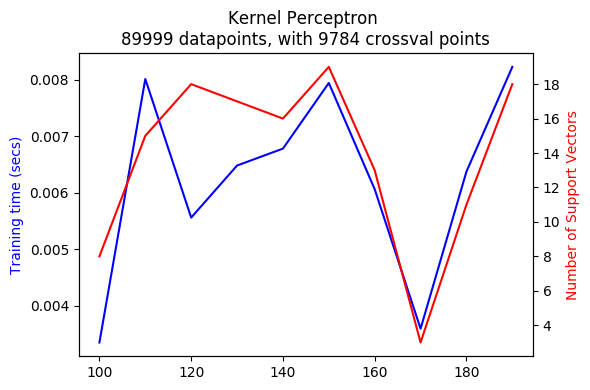

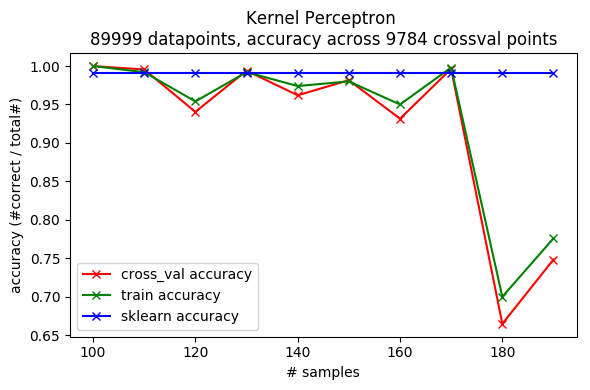

In [48]:
##############
# Calculate accuracy for kernel, varying # samples DONE
##############
# These are the parameters for the models. Please play with these and 
# note your observations about speed and successful hyperplane formation.
from sklearn import svm
pts = 1
nsamples_list = np.asarray(np.arange(100,200, (10)/pts), dtype=int)
print(nsamples_list)
times = []
cval_accuracies = []
train_accuracies = []
sk_cval_accuracies = []
numSVs = []
sknumSVs = []


data = np.loadtxt("data_short.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

for num in nsamples_list:
    clf = svm.SVC(kernel='linear') #important!
    print('!! fitting SVC!!')
    clf.fit(X,Y)
    k = KernelPerceptron(num)
    k.fit(X,Y) 
    times.append(k.timefit)
    
    yhats = k.predict(crossvalX)
    ytest_hats = k.predict(X)
    sk_yhats = clf.predict(crossvalX)
    
    numSV = len(k.SV_indices)
    sknumSV = len(clf.support_vectors_)
    numSVs.append(numSV)
    #sknumSVs.append(sknumSV)
    
    cval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    acc = sum([(y*y_hat>0) for y,y_hat in zip(Y, ytest_hats)]) / len(Y)
    skval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]) / len(crossvalY)
    print('skhats', np.array(sk_yhats))
    print('skcval accuracy', skval_acc)
    #print('boo', boo)
    train_accuracies.append(acc)
    cval_accuracies.append(cval_acc)
    sk_cval_accuracies.append(skval_acc)
#pp.savefig(aplot)
print(nsamples_list)
print(times)
print(numSVs)

print(cval_accuracies)
print(train_accuracies)
print(sk_cval_accuracies)

#plot time and support vectors

fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, times, 'b-')
ax1.set_ylabel("Training time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list,numSVs  , 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("Number of Support Vectors")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Kernel Perceptron \n%d datapoints, with %d crossval points" % \
(89999, 9784)
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
plt.xlabel("# samples")
fig.tight_layout()
plt.show()

# plot accuracies
fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, cval_accuracies, linestyle='-', marker='x', color='red', label='cross_val accuracy')
ax1.plot(nsamples_list, train_accuracies, linestyle='-', marker='x', color='green', label='train accuracy')
ax1.plot(nsamples_list, sk_cval_accuracies, linestyle='-', marker='x', color='blue', label='sklearn accuracy')
ax1.set_ylabel("accuracy (#correct / total#)")
ax1.legend()
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Kernel Perceptron \n%d datapoints, accuracy across %d crossval points" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("# samples")
fig.tight_layout()
plt.show()

## Budget

[  100  2090  4080  6070  8060 10050 12040 14030 16020 18010]


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.0030999183654785156  seconds.
N 100, beta 0, samples 100, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.25453758239746094 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  2.3094184398651123 seconds.
skcval 1.0


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.3456428050994873  seconds.
N 100, beta 0, samples 2090, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  2.214437961578369 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  15.489088535308838 seconds.
skcval 1.0


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  1.0831260681152344  seconds.
N 100, beta 0

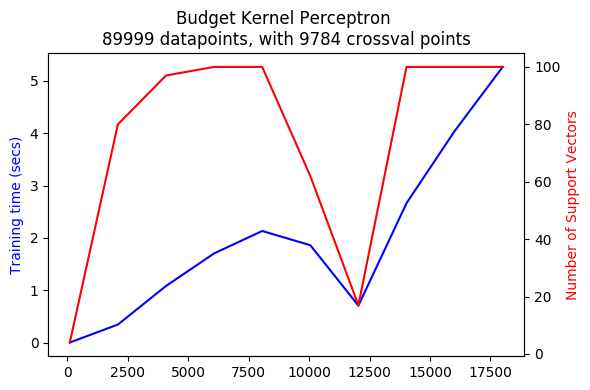

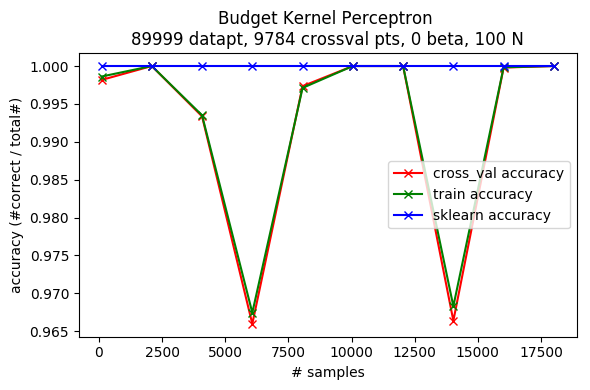

In [33]:
beta = 0
N = 100
##############
# Calculate accuracy for budget kernel, varying # samples 
##############
from sklearn import svm
pts = 10
nsamples_list = np.asarray(np.arange(100,20000, (20000-100)/pts), dtype=int)
print(nsamples_list)
times = []
cval_accuracies = []
train_accuracies = []
sk_cval_accuracies = []
numSVs = []
sknumSVs = []


data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

for num in nsamples_list:
    clf = svm.SVC(kernel='linear')
    clf.fit(X,Y)
    k = BudgetKernelPerceptron(beta, N, num)
    k.fit(X,Y) 
    times.append(k.timefit)
    
    yhats = k.predict(crossvalX)
    ytest_hats = k.predict(X)
    sk_yhats = clf.predict(crossvalX)
    
    numSV = len(k.SV_indices)
    sknumSV = len(clf.support_vectors_)
    numSVs.append(numSV)
    #sknumSVs.append(sknumSV)
    
    cval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    acc = sum([(y*y_hat>0) for y,y_hat in zip(Y, ytest_hats)]) / len(Y)
    skval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]) / len(crossvalY)
    boo = [(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]
    print('skcval', skval_acc)
    #print('boo', boo)
    train_accuracies.append(acc)
    cval_accuracies.append(cval_acc)
    sk_cval_accuracies.append(skval_acc)
#pp.savefig(aplot)
print(nsamples_list)
print(times)
print(numSVs)

print(cval_accuracies)
print(train_accuracies)
print(sk_cval_accuracies)

#plot time and support vectors

fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, times, 'b-')
ax1.set_ylabel("Training time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list,numSVs  , 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("Number of Support Vectors")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapoints, with %d crossval points" % \
(89999, 9784)
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
plt.xlabel("# samples")
fig.tight_layout()
plt.show()

# plot accuracies
fig, ax1 = plt.subplots()
ax1.plot(nsamples_list, cval_accuracies, linestyle='-', marker='x', color='red', label='cross_val accuracy')
ax1.plot(nsamples_list, train_accuracies, linestyle='-', marker='x', color='green', label='train accuracy')
ax1.plot(nsamples_list, sk_cval_accuracies, linestyle='-', marker='x', color='blue', label='sklearn accuracy')
ax1.set_ylabel("accuracy (#correct / total#)")
ax1.legend()
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapt, %d crossval pts, 0 beta, 100 N" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("# samples")
fig.tight_layout()
plt.show()

## Budget VS BETA

begin
~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.09644031524658203  seconds.
N 100, beta -2, samples 5000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.28870058059692383 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  2.2475850582122803 seconds.
skcval 1.0
~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.10349631309509277  seconds.
N 100, beta -1, samples 5000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.25688982009887695 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  2.5597517490386963 seconds.
skcval 1.0
~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fi

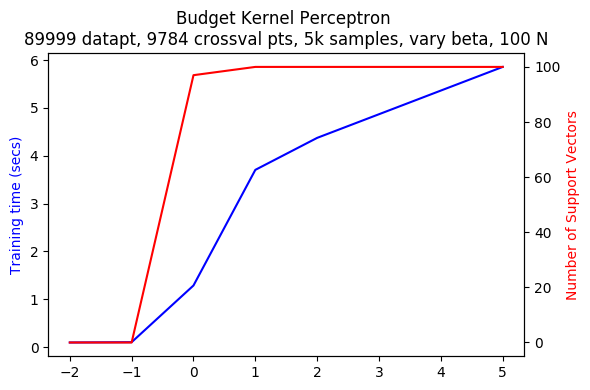

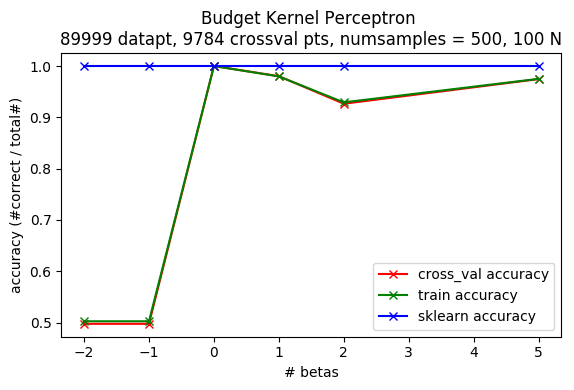

In [49]:
beta = 0
N = 100
num_samples = 5000
beta_list = [-2,-1,0,1,2,5]
##############
# Calculate accuracy for budget kernel, varying # samples 
##############
from sklearn import svm
pts = 10
#nsamples_list = np.asarray(np.arange(100,20000, (20000-100)/pts), dtype=int)
#print(nsamples_list)
times = []
cval_accuracies = []
train_accuracies = []
sk_cval_accuracies = []
numSVs = []
sknumSVs = []


data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

print('begin')
for beta in beta_list:
    clf = svm.SVC(kernel='linear')
    print('~~fitting sklearn')
    clf.fit(X,Y)
    k = BudgetKernelPerceptron(beta, N, num_samples)
    print('~~fitting budget kernel')
    k.fit(X,Y) 
    times.append(k.timefit)
    
    yhats = k.predict(crossvalX)
    ytest_hats = k.predict(X)
    sk_yhats = clf.predict(crossvalX)
    
    numSV = len(k.SV_indices)
    sknumSV = len(clf.support_vectors_)
    numSVs.append(numSV)
    #sknumSVs.append(sknumSV)
    
    cval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    acc = sum([(y*y_hat>0) for y,y_hat in zip(Y, ytest_hats)]) / len(Y)
    skval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]) / len(crossvalY)
    boo = [(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]
    print('skcval', skval_acc)
    #print('boo', boo)
    train_accuracies.append(acc)
    cval_accuracies.append(cval_acc)
    sk_cval_accuracies.append(skval_acc)
#pp.savefig(aplot)
print(nsamples_list)
print(times)
print(numSVs)

print(cval_accuracies)
print(train_accuracies)
print(sk_cval_accuracies)

#plot time and support vectors

fig, ax1 = plt.subplots()
ax1.plot(beta_list, times, 'b-')
ax1.set_ylabel("Training time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(beta_list,numSVs  , 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("Number of Support Vectors")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapt, %d crossval pts, 5k samples, vary beta, 100 N" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("# betas")
fig.tight_layout()
plt.show()

# plot accuracies
fig, ax1 = plt.subplots()
ax1.plot(beta_list, cval_accuracies, linestyle='-', marker='x', color='red', label='cross_val accuracy')
ax1.plot(beta_list, train_accuracies, linestyle='-', marker='x', color='green', label='train accuracy')
ax1.plot(beta_list, sk_cval_accuracies, linestyle='-', marker='x', color='blue', label='sklearn accuracy')
ax1.set_ylabel("accuracy (#correct / total#)")
ax1.legend()
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapt, %d crossval pts, numsamples = 500, 100 N" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("# betas")
fig.tight_layout()
plt.show()

## Budget VS N support vectors

~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.21719145774841309  seconds.
N 10, beta 0, samples 5000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.35867738723754883 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  3.3965322971343994 seconds.
skcval 1.0
~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.8372187614440918  seconds.
N 50, beta 0, samples 5000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  1.2282824516296387 seconds.
=== Predicting ===
Elapsed time for predicting (89999, 2)  datapoints:  11.038785219192505 seconds.
skcval 1.0
~~fitting sklearn
~~fitting budget kernel


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (8999

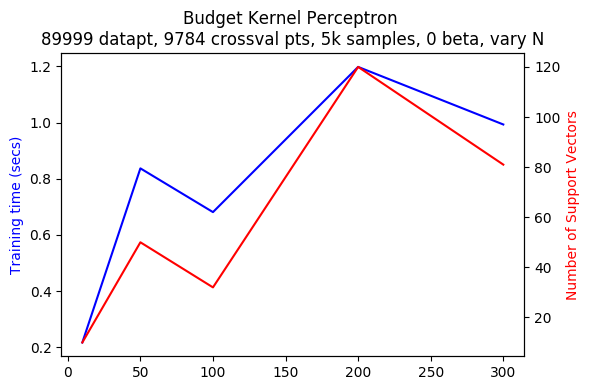

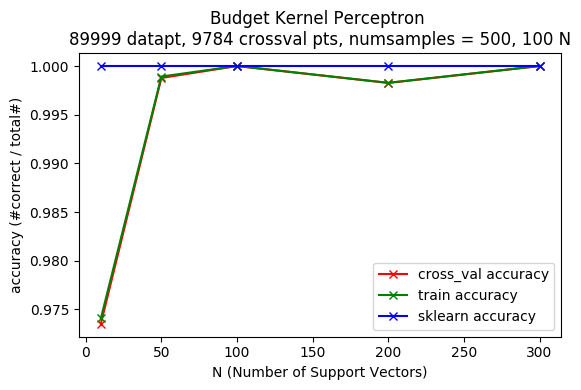

In [39]:
beta = 0
N = 100
num_samples = 5000
N_list= [10,50,100,200,300]
##############
# Calculate accuracy for budget kernel, varying # samples 
##############
from sklearn import svm
pts = 10
#nsamples_list = np.asarray(np.arange(100,20000, (20000-100)/pts), dtype=int)
#print(nsamples_list)
times = []
cval_accuracies = []
train_accuracies = []
sk_cval_accuracies = []
numSVs = []
sknumSVs = []


data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

for N in N_list:
    clf = svm.SVC(kernel='linear')
    print('~~fitting sklearn')
    clf.fit(X,Y)
    k = BudgetKernelPerceptron(beta, N, num_samples)
    print('~~fitting budget kernel')
    k.fit(X,Y) 
    times.append(k.timefit)
    
    yhats = k.predict(crossvalX)
    ytest_hats = k.predict(X)
    sk_yhats = clf.predict(crossvalX)
    
    numSV = len(k.SV_indices)
    sknumSV = len(clf.support_vectors_)
    numSVs.append(numSV)
    #sknumSVs.append(sknumSV)
    
    cval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    acc = sum([(y*y_hat>0) for y,y_hat in zip(Y, ytest_hats)]) / len(Y)
    skval_acc = sum([(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]) / len(crossvalY)
    boo = [(y*y_hat>0) for y,y_hat in zip(crossvalY, sk_yhats)]
    print('skcval', skval_acc)
    #print('boo', boo)
    train_accuracies.append(acc)
    cval_accuracies.append(cval_acc)
    sk_cval_accuracies.append(skval_acc)
#pp.savefig(aplot)
print(N_list)
print(times)
print(numSVs)

print(cval_accuracies)
print(train_accuracies)
print(sk_cval_accuracies)

#plot time and support vectors

fig, ax1 = plt.subplots()
ax1.plot(N_list, times, 'b-')
ax1.set_ylabel("Training time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(N_list,numSVs  , 'r-')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("Number of Support Vectors")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapt, %d crossval pts, 5k samples, 0 beta, vary N" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("# betas")
fig.tight_layout()
plt.show()

# plot accuracies
fig, ax1 = plt.subplots()
ax1.plot(N_list, cval_accuracies, linestyle='-', marker='x', color='red', label='cross_val accuracy')
ax1.plot(N_list, train_accuracies, linestyle='-', marker='x', color='green', label='train accuracy')
ax1.plot(N_list, sk_cval_accuracies, linestyle='-', marker='x', color='blue', label='sklearn accuracy')
ax1.set_ylabel("accuracy (#correct / total#)")
ax1.legend()
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron \n%d datapt, %d crossval pts, numsamples = 500, 100 N" % \
(89999, 9784)
plt.title(bstr)
plt.xlabel("N (Number of Support Vectors)")
fig.tight_layout()
plt.show()

## Budget OLD IGNORE 

In [19]:
##############
# Calculate accuracy for BK, varying # samples DONE
##############
pts = 20
nsamples_list = np.asarray(np.arange(100,25000, (25000-100)/pts), dtype=int)
print(nsamples_list)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
for num in nsamples_list:
    k = BudgetKernelPerceptron(beta, N, num)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    ytesthats = k.predict(X)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(np.array(nsamples_list))
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("# samples")
ax1.plot(nsamples_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(nsamples_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, \n%d datapoints Fit: %.02f secs, accuracy across %d crossval points" % \
(np.array(X).shape[0], k.timefit, len(crossvalY))
plt.title(bstr)
fig.tight_layout()
plt.show()

[  100  1345  2590  3835  5080  6325  7570  8815 10060 11305 12550 13795
 15040 16285 17530 18775 20020 21265 22510 23755]


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.004778146743774414  seconds.
N 100, beta 0, samples 100, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.4989922046661377 seconds.
test shape (9784,)
num correct 8178
totaly sampes 89999
accuracy 0.8358544562551103


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.18508625030517578  seconds.
N 100, beta 0, samples 1345, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  1.9028825759887695 seconds.
test shape (9784,)
num correct 9246
totaly sampes 89999
accuracy 0.9450122649223222


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.2340526580810547  seconds.
N 100,

KeyboardInterrupt: 



========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.17995381355285645  seconds.
N 0, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.14259099960327148 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.27336668968200684  seconds.
N 2, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.19914650917053223 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.31046319007873535  seconds.
N 5, beta 0, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.2441394329

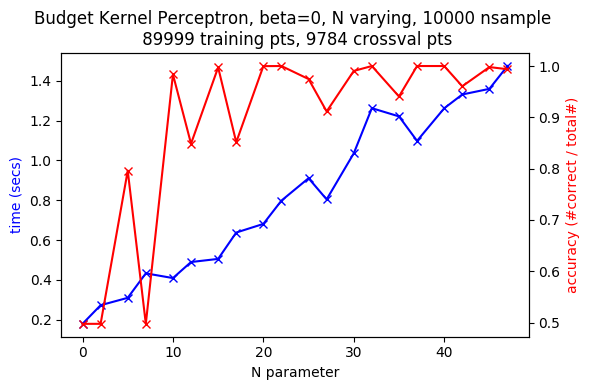

In [26]:
##############
# Calculate accuracy for BK, varying #N
##############
pts = 20
N_list = np.asarray(np.arange(0,50, (50-0)/pts), dtype=int)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
nsample = 10000 #small for running faster
for N in N_list:
    k = BudgetKernelPerceptron(beta, N, nsample)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(N_list)
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("N parameter")
ax1.plot(N_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(N_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, beta=0, N varying, %d nsample \n %d training pts, %d crossval pts" % \
(nsample, 89999, 9784)
plt.title(bstr)
fig.tight_layout()
plt.show()

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.09609293937683105  seconds.
N 100, beta -5, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.13905048370361328 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.09128594398498535  seconds.
N 100, beta -4, samples 10000, data shape 89999
=== Predicting ===
Elapsed time for predicting (9784, 2)  datapoints:  0.15418553352355957 seconds.
test shape (9784,)
num correct 4869
totaly sampes 89999
accuracy 0.4976492232215863


========= *** Fitting Budget Perceptron *** ==========
Elapsed time for fitting  (89999, 2)  datapoints:  0.10715579986572266  seconds.
N 100, beta -3, samples 10000, data shape 89999
=== Predicti

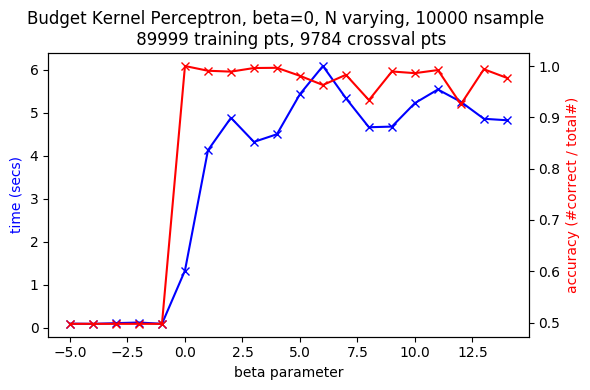

In [27]:
##############
# Calculate accuracy for BK, varying #beta
##############
pts = 20
beta_list = np.asarray(np.arange(-5,15, (15+5)/pts), dtype=int)
print(beta_list)
times = []
accuracies = []

data = np.loadtxt("data.csv", delimiter=',')
cval_data = np.loadtxt("val.csv", delimiter=',')
X = data[:, :2]
Y = data[:, 2]
crossvalX = cval_data[:, :2]
crossvalY = cval_data[:, 2]

beta = 0
N =  100
nsample = 10000 #small for running faster

for beta in beta_list:
    k = BudgetKernelPerceptron(beta, N, nsample)
    k.fit(X,Y) 
    times.append(k.timefit)
    yhats = k.predict(crossvalX)
    test = [(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]
    print('test shape',np.array(test).shape)
    print('num correct', sum(test))
    print('totaly sampes', len(Y))
    accuracy = sum([(y*y_hat>0) for y, y_hat in zip(crossvalY, yhats)]) / len(crossvalY)
    print('accuracy', accuracy)
    accuracies.append(accuracy)
#pp.savefig(aplot)
print(np.array(nsamples_list))
print(times)
print(accuracies)

fig, ax1 = plt.subplots()
plt.xlabel("beta parameter")
ax1.plot(beta_list, times, linestyle='-', marker='x', color='blue')
ax1.set_ylabel("time (secs)")
ax1.yaxis.label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(beta_list, accuracies, linestyle='-', marker='x', color='red')
ax2.yaxis.label.set_color("red")
ax2.set_ylabel("accuracy (#correct / total#)")
fig = plt.gcf()
fig.figsize=(5,5)
fig.dpi=100
bstr = "Budget Kernel Perceptron, beta=0, N varying, %d nsample \n %d training pts, %d crossval pts" % \
(nsample, 89999, 9784)
plt.title(bstr)
fig.tight_layout()
plt.show()

In [ ]:
            # plt.xlabel('X dimension 1\n Red is class 1, Green is class -1')
            # plt.ylabel('X dimension 2')
            # plt.title(text)

# for beta in beta_list:
    # bk = BudgetKernelPerceptron(beta, N, numsamples)
    # bk.fit(X, Y)
    # print('predict time', bk.timepredict)
    # print('fit time', bk.timefit)
    # bstr = "Budget Kernel Perceptron, \n%d datapoints with %d samples, %d N, %d beta \nFit: %.02f secs" % \
            # (np.array(X).shape[0], numsamples, N, beta, bk.timefit)
# #    plt2 = bk.visualize(budget_kernel_file_name, width=0, show_charts=False, save_fig=False,
# #            include_points=True, text=bstr)
    # #plt2.savefig('budgetkernel_%dsamples_%dN_%dbeta.png' % (numsamples, N, beta))

##############